In [15]:
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk

In [16]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\spam.csv", encoding='latin-1')

In [17]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [20]:
df.shape



(5572, 5)

In [21]:
#dropping unwanted columns
df=df.dropna(axis=1)

In [22]:
df.shape

(5572, 2)

In [23]:
df.dtypes

v1    object
v2    object
dtype: object

In [24]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<Axes: xlabel='v1', ylabel='count'>

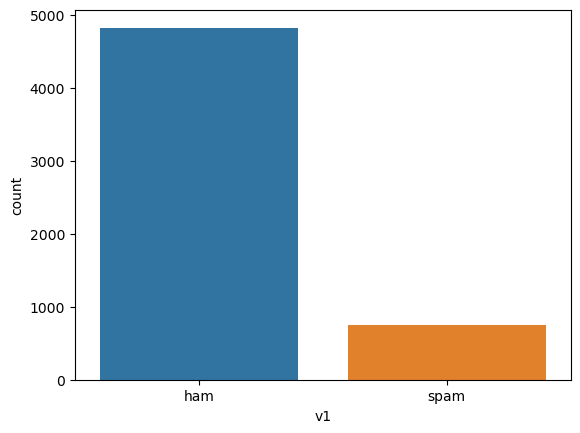

In [25]:
sns.countplot(x='v1', data=df, label='count')

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()

In [27]:
#TRANSFORMING CATEGORICAL DATA TO NUMERICAL DATA
df[df.columns[0]] = labelencoder_Y.fit_transform(df.iloc[:, 0].values)

In [28]:
df.iloc[:,0].values

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [33]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [35]:
print("Naive Byes Classifier")
# Predict the labels for the test set
nb_pred = nb_classifier.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, nb_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, nb_pred)
print(f'Accuracy: {accuracy:.2f}')


Naive Byes Classifier
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy: 0.97


In [36]:

LR = LogisticRegression()

# Train the classifier
LR.fit(X_train_tfidf, y_train)

print("Logistic Regression")
# Predict the labels for the test set
LR_pred = LR.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, LR_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, LR_pred)
print(f'Accuracy: {accuracy:.2f}')

Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 0.95


In [37]:

SVM =  SVC(kernel='linear')

# Train the classifier
SVM.fit(X_train_tfidf, y_train)

print("Support Vector Machine")
# Predict the labels for the test set
SVM_pred = SVM.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, SVM_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, SVM_pred)
print(f'Accuracy: {accuracy:.2f}')

Support Vector Machine
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.98


In [40]:
# Comparing the accuracy
print("Naive Bayes Accuracy : ",accuracy_score(y_test, nb_pred))
print("Logistic Regression Accuracy : ",accuracy_score(y_test, LR_pred))
print("Support Vector Machine Accuracy : ",accuracy_score(y_test, SVM_pred))

Naive Bayes Accuracy :  0.9668161434977578
Logistic Regression Accuracy :  0.9524663677130045
Support Vector Machine Accuracy :  0.979372197309417
